In [47]:
import os
import json
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import rgb2hex
from descartes import PolygonPatch
from shapely.geometry import Polygon, MultiPolygon
import plotly.offline as py#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

In [3]:
import json

tweets_data = []
tweets_file = open('geotagged_tweets_20160812-0912.jsons', "r")
print(tweets_file)

counter = 0
for line in tweets_file:
    counter = counter + 1
    if counter > 50000:
        break
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

<_io.TextIOWrapper name='geotagged_tweets_20160812-0912.jsons' mode='r' encoding='cp1252'>


In [4]:
import pandas as pd

from pandas.io.json import json_normalize
# Thank gawd for this package - all json fields straight into columns in a dataframe, no bullshit
tweets_df = json_normalize(tweets_data)

tweets_df.head()

,contributors,coordinates,coordinates.coordinates,coordinates.type,created_at,entities.hashtags,entities.media,entities.symbols,entities.urls,entities.user_mentions,...,user.profile_sidebar_fill_color,user.profile_text_color,user.profile_use_background_image,user.protected,user.screen_name,user.statuses_count,user.time_zone,user.url,user.utc_offset,user.verified
0,None,NaN,NaN,NaN,Fri Aug 12 10:04:00 +0000 2016,[],"[{'id': 764039718237409281, 'id_str': '7640397...",[],[],"[{'screen_name': 'theblaze', 'name': 'TheBlaze...",...,EFEFEF,333333,True,False,DUPUY77,17620,None,http://ggm-dupuy.com,NaN,False
1,None,NaN,NaN,NaN,Fri Aug 12 10:04:02 +0000 2016,"[{'text': 'NOJUSTICE', 'indices': [62, 72]}, {...",NaN,[],"[{'url': 'https://t.co/5GMNZq40V3', 'expanded_...","[{'screen_name': 'BarackObama', 'name': 'Barac...",...,000000,000000,False,False,redoctapus,5046,Eastern Time (US & Canada),None,-14400.0,False
2,None,NaN,NaN,NaN,Fri Aug 12 10:04:10 +0000 2016,[],"[{'id': 764039762973896704, 'id_str': '7640397...",[],[],"[{'screen_name': 'theblaze', 'name': 'TheBlaze...",...,EFEFEF,333333,True,False,DUPUY77,17621,None,http://ggm-dupuy.com,NaN,False
3,None,NaN,NaN,NaN,Fri Aug 12 10:04:21 +0000 2016,[],NaN,[],[],"[{'screen_name': 'HillaryClinton', 'name': 'Hi...",...,99CC33,3E4415,True,False,jjorgi30,2231,Melbourne,None,36000.0,False
4,None,NaN,NaN,NaN,Fri Aug 12 10:04:30 +0000 2016,"[{'text': 'CNN', 'indices': [0, 4]}, {'text': ...",NaN,[],[],[],...,F3F3F3,333333,True,False,bspence5,92605,None,None,NaN,False


In [5]:
cols = []

for col in tweets_df.columns:
    if col in ('text', 'created_at', 'place/country', 'place.country','place.country_code','place.name','is_quote_status','lang','text','user.created_at','user.description','user.name','user.location','place.place_type', 'user-screen_name', 'in_reply_to_screen_name','geo.type','geo.coordinates', 'retweeted_status-text'):
        cols.append(col)

neat_df = tweets_df[cols]
neat_df

,created_at,geo.coordinates,geo.type,in_reply_to_screen_name,is_quote_status,lang,place.country,place.country_code,place.name,place.place_type,text,user.created_at,user.description,user.location,user.name
0,Fri Aug 12 10:04:00 +0000 2016,NaN,NaN,theblaze,False,und,United States,US,Frontenac,city,@theblaze @realDonaldTrump https://t.co/TY9DlZ...,Fri Sep 02 14:54:17 +0000 2011,"Fashion photographer, love action and adventur...",Miami,GIL DUPUY
1,Fri Aug 12 10:04:02 +0000 2016,NaN,NaN,BarackObama,False,en,United States,US,Baton Rouge,city,@BarackObama \n@FBI\n@LORETTALYNCH \nALL IN CO...,Thu Oct 15 00:28:04 +0000 2009,"AWSCWI Pipefitter USAF NRA I remember USA, Hun...","Ogletown, DE",Red Octopus
2,Fri Aug 12 10:04:10 +0000 2016,NaN,NaN,theblaze,False,und,United States,US,Frontenac,city,@theblaze @realDonaldTrump https://t.co/n050DB...,Fri Sep 02 14:54:17 +0000 2011,"Fashion photographer, love action and adventur...",Miami,GIL DUPUY
3,Fri Aug 12 10:04:21 +0000 2016,NaN,NaN,HillaryClinton,False,en,Australia,AU,Melbourne,city,@HillaryClinton he will do in one year all the...,Tue Jun 02 01:59:59 +0000 2009,The best movies are written and directed by pe...,Australia,JanJorgenson
4,Fri Aug 12 10:04:30 +0000 2016,NaN,NaN,None,False,en,United States,US,Baltimore,city,#CNN #newday clear #Trump deliberately throwin...,Mon Aug 20 09:43:48 +0000 2012,"Retired, political wonk mother of one grandmot...",None,Beverly Spence
5,Fri Aug 12 10:04:46 +0000 2016,NaN,NaN,realDonaldTrump,True,en,United States,US,Palm Springs,city,"@realDonaldTrump, you wouldn't recognize a lie...",Tue May 19 03:18:19 +0000 2009,"I am a retired psychologist in Palm Springs, C...","Palm Springs, CA","Asa DeMatteo, Ph.D."
6,Fri Aug 12 10:04:47 +0000 2016,NaN,NaN,None,True,und,United Kingdom,GB,Hammersmith,city,#Trump2016 #TrumpPence16 #MakeAmericaGreatAgai...,Wed Nov 21 17:21:00 +0000 2012,None,Stuck in the middle with you,Hank Moody
7,Fri Aug 12 10:04:48 +0000 2016,NaN,NaN,None,False,en,United States,US,Secaucus,city,"""Kid, you know, suing someone? Thats the most ...",Sun Aug 07 00:57:29 +0000 2016,Actor/Buddhist/Eccentric/Improv Comic/Libertar...,"Secaucus, NJ",Rafael Alejandro
8,Fri Aug 12 10:04:48 +0000 2016,NaN,NaN,HillaryClinton,False,en,United States,US,Irving,city,@HillaryClinton you ARE the co-founder of ISIS...,Wed Oct 28 18:34:22 +0000 2009,None,"Irving, TX",tom b
9,Fri Aug 12 10:04:49 +0000 2016,NaN,NaN,Geraldanthro,False,en,Australia,AU,Brisbane,city,@Geraldanthro @NeilTurner_ @realDonaldTrump wa...,Mon Aug 06 13:27:59 +0000 2012,CE27HE27OE27NE26PE25SE24CaE25KE24ClE24NaE24MgE...,Queensland OZ,michael halliday777


In [6]:
def label_language(df) :
    if df["lang"] == "en" :
        return "English"
    elif df["lang"] == "es" :
        return "Spanish"
    elif df["lang"] == "ger":
        return "German"
    elif df["lang"] == "nl" :
        return "Dutch"
    elif df["lang"] == "it" :
        return "Italian"
    elif df["lang"] == "fr":
        return "French"
    else :
        return "Other"
neat_df["lang"] = neat_df.apply(lambda neat_df:label_language(neat_df),axis = 1)

In [7]:
neat_df.head(n = 10)

,created_at,geo.coordinates,geo.type,in_reply_to_screen_name,is_quote_status,lang,place.country,place.country_code,place.name,place.place_type,text,user.created_at,user.description,user.location,user.name
0,Fri Aug 12 10:04:00 +0000 2016,NaN,NaN,theblaze,False,Other,United States,US,Frontenac,city,@theblaze @realDonaldTrump https://t.co/TY9DlZ...,Fri Sep 02 14:54:17 +0000 2011,"Fashion photographer, love action and adventur...",Miami,GIL DUPUY
1,Fri Aug 12 10:04:02 +0000 2016,NaN,NaN,BarackObama,False,English,United States,US,Baton Rouge,city,@BarackObama \n@FBI\n@LORETTALYNCH \nALL IN CO...,Thu Oct 15 00:28:04 +0000 2009,"AWSCWI Pipefitter USAF NRA I remember USA, Hun...","Ogletown, DE",Red Octopus
2,Fri Aug 12 10:04:10 +0000 2016,NaN,NaN,theblaze,False,Other,United States,US,Frontenac,city,@theblaze @realDonaldTrump https://t.co/n050DB...,Fri Sep 02 14:54:17 +0000 2011,"Fashion photographer, love action and adventur...",Miami,GIL DUPUY
3,Fri Aug 12 10:04:21 +0000 2016,NaN,NaN,HillaryClinton,False,English,Australia,AU,Melbourne,city,@HillaryClinton he will do in one year all the...,Tue Jun 02 01:59:59 +0000 2009,The best movies are written and directed by pe...,Australia,JanJorgenson
4,Fri Aug 12 10:04:30 +0000 2016,NaN,NaN,None,False,English,United States,US,Baltimore,city,#CNN #newday clear #Trump deliberately throwin...,Mon Aug 20 09:43:48 +0000 2012,"Retired, political wonk mother of one grandmot...",None,Beverly Spence
5,Fri Aug 12 10:04:46 +0000 2016,NaN,NaN,realDonaldTrump,True,English,United States,US,Palm Springs,city,"@realDonaldTrump, you wouldn't recognize a lie...",Tue May 19 03:18:19 +0000 2009,"I am a retired psychologist in Palm Springs, C...","Palm Springs, CA","Asa DeMatteo, Ph.D."
6,Fri Aug 12 10:04:47 +0000 2016,NaN,NaN,None,True,Other,United Kingdom,GB,Hammersmith,city,#Trump2016 #TrumpPence16 #MakeAmericaGreatAgai...,Wed Nov 21 17:21:00 +0000 2012,None,Stuck in the middle with you,Hank Moody
7,Fri Aug 12 10:04:48 +0000 2016,NaN,NaN,None,False,English,United States,US,Secaucus,city,"""Kid, you know, suing someone? Thats the most ...",Sun Aug 07 00:57:29 +0000 2016,Actor/Buddhist/Eccentric/Improv Comic/Libertar...,"Secaucus, NJ",Rafael Alejandro
8,Fri Aug 12 10:04:48 +0000 2016,NaN,NaN,HillaryClinton,False,English,United States,US,Irving,city,@HillaryClinton you ARE the co-founder of ISIS...,Wed Oct 28 18:34:22 +0000 2009,None,"Irving, TX",tom b
9,Fri Aug 12 10:04:49 +0000 2016,NaN,NaN,Geraldanthro,False,English,Australia,AU,Brisbane,city,@Geraldanthro @NeilTurner_ @realDonaldTrump wa...,Mon Aug 06 13:27:59 +0000 2012,CE27HE27OE27NE26PE25SE24CaE25KE24ClE24NaE24MgE...,Queensland OZ,michael halliday777


In [7]:
neat_df["lang"]

0          Other
1        English
2          Other
3        English
4        English
5        English
6          Other
7        English
8        English
9        English
10       English
11       English
12       English
13       English
14       English
15       English
16       English
17       English
18       English
19       English
20       English
21       English
22       English
23       English
24       English
25       English
26       English
27       English
28       English
29       English
          ...   
49970    English
49971    English
49972    English
49973    English
49974    English
49975    English
49976    English
49977    English
49978    English
49979    English
49980      Other
49981    English
49982    English
49983    English
49984    English
49985    English
49986    English
49987    English
49988    English
49989    English
49990    English
49991    English
49992    English
49993    English
49994      Other
49995    English
49996    English
49997    Engli

In [8]:
tweets_by_lang = neat_df['lang'].value_counts()
tweets_by_lang

English    43663
Other       5738
Spanish      353
French       159
Italian       48
Dutch         39
Name: lang, dtype: int64

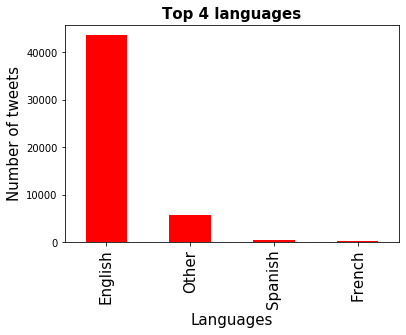

In [9]:
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 4 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:4].plot(ax=ax, kind='bar', color='red')

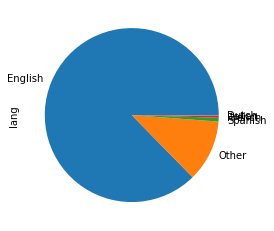

In [10]:
neat_df['lang'].value_counts().plot(kind="pie")

In [11]:
tweets_by_country = neat_df['place.country'].value_counts()

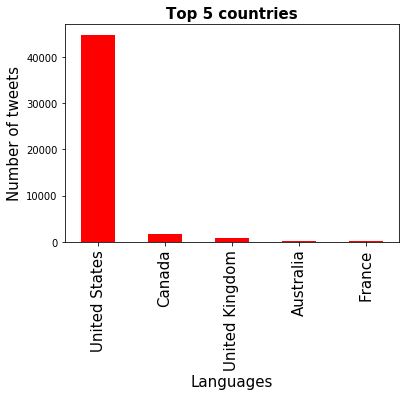

In [12]:
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='red')

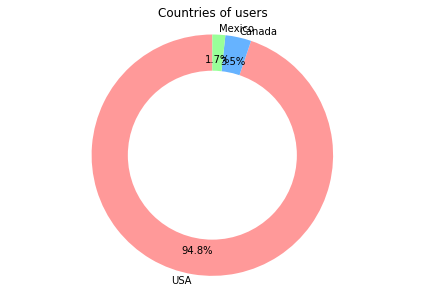

In [13]:
labels = ['USA', 'Canada', 'Mexico']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig1, ax1 = plt.subplots()
ax1.pie(tweets_by_country[:3], colors = colors, labels = labels, autopct='%1.1f%%', startangle=90, pctdistance=0.8, labeldistance=1.05)#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
ax1.set_title("Countries of users")
plt.show()

In [14]:
reply_trump= (neat_df[(neat_df["in_reply_to_screen_name"] == "realDonaldTrump")].reset_index()
                  .drop(columns = ["index"],axis = 1))
reply_hillary= (neat_df[(neat_df["in_reply_to_screen_name"] == "HillaryClinton")].reset_index()
                  .drop(columns = ["index"],axis = 1))
#This is not true because not all tweets were replies. Gonna fix this
reply_total= (neat_df[(neat_df["in_reply_to_screen_name"] == "")].reset_index()
                  .drop(columns = ["index"],axis = 1))

In [15]:
amount_replies_trump = len(reply_trump.index)
amount_replies_hillary = len(reply_hillary.index)
rest = len(neat_df.index) - amount_replies_trump - amount_replies_hillary
total = len(neat_df.index)


percentage_reply_hillary = amount_replies_hillary / total
percentage_reply_trump = amount_replies_trump / total
percentage_rest = (total - amount_replies_trump - amount_replies_hillary) / total


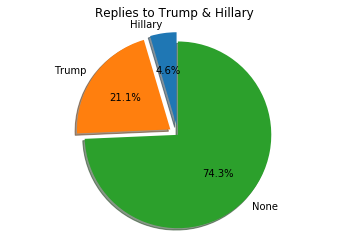

In [16]:
labels = 'Hillary', 'Trump', 'None'
sizes = [amount_replies_hillary, amount_replies_trump ,rest]
explode = (0.1, 0.1, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title("Replies to Trump & Hillary")

plt.show()

In [17]:
neat_df["hashtag"]  = neat_df['text'].str.findall(r'#.*?(?=\s|$)')
neat_df

,created_at,geo.coordinates,geo.type,in_reply_to_screen_name,is_quote_status,lang,place.country,place.country_code,place.name,place.place_type,text,user.created_at,user.description,user.location,user.name,hashtag
0,Fri Aug 12 10:04:00 +0000 2016,NaN,NaN,theblaze,False,Other,United States,US,Frontenac,city,@theblaze @realDonaldTrump https://t.co/TY9DlZ...,Fri Sep 02 14:54:17 +0000 2011,"Fashion photographer, love action and adventur...",Miami,GIL DUPUY,[]
1,Fri Aug 12 10:04:02 +0000 2016,NaN,NaN,BarackObama,False,English,United States,US,Baton Rouge,city,@BarackObama \n@FBI\n@LORETTALYNCH \nALL IN CO...,Thu Oct 15 00:28:04 +0000 2009,"AWSCWI Pipefitter USAF NRA I remember USA, Hun...","Ogletown, DE",Red Octopus,"[#NOJUSTICE, #TrumpPence]"
2,Fri Aug 12 10:04:10 +0000 2016,NaN,NaN,theblaze,False,Other,United States,US,Frontenac,city,@theblaze @realDonaldTrump https://t.co/n050DB...,Fri Sep 02 14:54:17 +0000 2011,"Fashion photographer, love action and adventur...",Miami,GIL DUPUY,[]
3,Fri Aug 12 10:04:21 +0000 2016,NaN,NaN,HillaryClinton,False,English,Australia,AU,Melbourne,city,@HillaryClinton he will do in one year all the...,Tue Jun 02 01:59:59 +0000 2009,The best movies are written and directed by pe...,Australia,JanJorgenson,[]
4,Fri Aug 12 10:04:30 +0000 2016,NaN,NaN,None,False,English,United States,US,Baltimore,city,#CNN #newday clear #Trump deliberately throwin...,Mon Aug 20 09:43:48 +0000 2012,"Retired, political wonk mother of one grandmot...",None,Beverly Spence,"[#CNN, #newday, #Trump, #ISIS]"
5,Fri Aug 12 10:04:46 +0000 2016,NaN,NaN,realDonaldTrump,True,English,United States,US,Palm Springs,city,"@realDonaldTrump, you wouldn't recognize a lie...",Tue May 19 03:18:19 +0000 2009,"I am a retired psychologist in Palm Springs, C...","Palm Springs, CA","Asa DeMatteo, Ph.D.",[#NeverTrump]
6,Fri Aug 12 10:04:47 +0000 2016,NaN,NaN,None,True,Other,United Kingdom,GB,Hammersmith,city,#Trump2016 #TrumpPence16 #MakeAmericaGreatAgai...,Wed Nov 21 17:21:00 +0000 2012,None,Stuck in the middle with you,Hank Moody,"[#Trump2016, #TrumpPence16, #MakeAmericaGreatA..."
7,Fri Aug 12 10:04:48 +0000 2016,NaN,NaN,None,False,English,United States,US,Secaucus,city,"""Kid, you know, suing someone? Thats the most ...",Sun Aug 07 00:57:29 +0000 2016,Actor/Buddhist/Eccentric/Improv Comic/Libertar...,"Secaucus, NJ",Rafael Alejandro,[]
8,Fri Aug 12 10:04:48 +0000 2016,NaN,NaN,HillaryClinton,False,English,United States,US,Irving,city,@HillaryClinton you ARE the co-founder of ISIS...,Wed Oct 28 18:34:22 +0000 2009,None,"Irving, TX",tom b,[]
9,Fri Aug 12 10:04:49 +0000 2016,NaN,NaN,Geraldanthro,False,English,Australia,AU,Brisbane,city,@Geraldanthro @NeilTurner_ @realDonaldTrump wa...,Mon Aug 06 13:27:59 +0000 2012,CE27HE27OE27NE26PE25SE24CaE25KE24ClE24NaE24MgE...,Queensland OZ,michael halliday777,[]


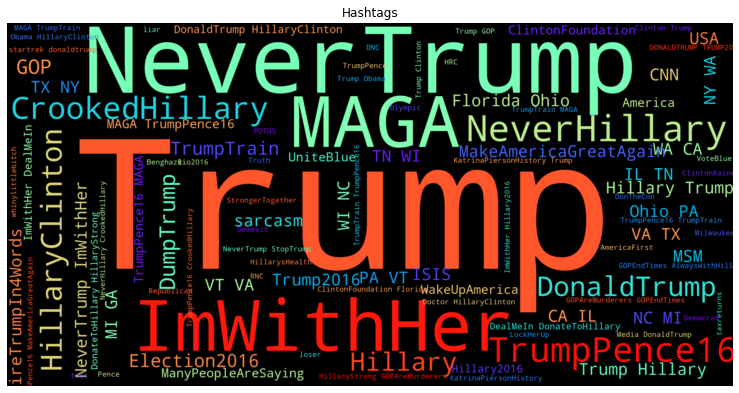

In [18]:
from wordcloud import WordCloud

hashtag_words = neat_df["text"].str.extractall(r'(\#\w+)')[0]


def make_cloud(words,back_color,palette,title) :
    word_cloud = WordCloud(scale = 7,max_words = 1000,
                           max_font_size = 100,background_color = back_color,
                           random_state = 0,colormap = palette
                          ).generate(" ".join(words))
    plt.figure(figsize = (13,8))
    plt.imshow(word_cloud,interpolation = "bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

make_cloud(hashtag_words,"black","rainbow","Hashtags")

In [ ]:

from wordcloud import WordCloud

accounts_mentioned = neat_df["text"].str.extractall(r'(\@\w+)')[0]


def make_cloud(words,back_color,palette,title) :
    word_cloud = WordCloud(scale = 7,max_words = 1000,
                           max_font_size = 100,background_color = back_color,
                           random_state = 0,colormap = palette
                          ).generate(" ".join(words))
    plt.figure(figsize = (13,8))
    plt.imshow(word_cloud,interpolation = "bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

make_cloud(accounts_mentioned,"black","cool","Hashtags")

In [20]:
def look_for_word(word, df):
    contains_column = df['text'].str.contains(word, case = False)
    return contains_column

In [21]:
#Trump
t_mentioned = look_for_word('trump', neat_df)
dt_mentioned = look_for_word('donald trump', neat_df)
trump_total_mentioned = np.sum(t_mentioned) + np.sum(dt_mentioned)
#Hillary
h_mentioned = look_for_word('hillary', neat_df)
hc_mentioned = look_for_word('hillary clinton', neat_df)
hillary_total_mentioned = np.sum(h_mentioned) + np.sum(hc_mentioned)
#Bernie
b_mentioned = look_for_word('bernie', neat_df)
bs_mentioned = look_for_word('bernie sanders', neat_df)
bernie_total_mentioned = np.sum(b_mentioned) + np.sum(bs_mentioned)
#Obama
o_mentioned = look_for_word('obama', neat_df)
bo_mentioned = look_for_word('barack obama', neat_df)
obama_total_mentioned = np.sum(o_mentioned) + np.sum(bo_mentioned)
#Bill Clinton
bill_mentioned = look_for_word('bill clinton', neat_df)
bill_total_mentioned = np.sum(bill_mentioned)


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
names = ['D. Trump', 'H. Clinton', 'B. Obama', 'B. Sanders', 'B. Clinton']
values = [trump_total_mentioned, hillary_total_mentioned, obama_total_mentioned, bernie_total_mentioned, bill_total_mentioned]

x_pos = [i for i, _ in enumerate(names)]

plt.bar(x_pos, values, color='red')
plt.xlabel("Person")
plt.ylabel("Number of mentions in tweets")
plt.title("Amounts of mentions in tweets for important people during the election")

plt.xticks(x_pos, names)

plt.show()


In [23]:
def find_retweeted(tweet):
    '''This function will extract the twitter handles of retweed people'''
    return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

In [24]:
def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)
def find_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)  

In [29]:
import re
neat_df['hashtags'] = neat_df.text.apply(find_hashtags)
neat_df.head()

,created_at,geo.coordinates,geo.type,in_reply_to_screen_name,is_quote_status,lang,place.country,place.country_code,place.name,place.place_type,text,user.created_at,user.description,user.location,user.name,hashtag,hashtags
0,Fri Aug 12 10:04:00 +0000 2016,NaN,NaN,theblaze,False,Other,United States,US,Frontenac,city,@theblaze @realDonaldTrump https://t.co/TY9DlZ...,Fri Sep 02 14:54:17 +0000 2011,"Fashion photographer, love action and adventur...",Miami,GIL DUPUY,[],[]
1,Fri Aug 12 10:04:02 +0000 2016,NaN,NaN,BarackObama,False,English,United States,US,Baton Rouge,city,@BarackObama \n@FBI\n@LORETTALYNCH \nALL IN CO...,Thu Oct 15 00:28:04 +0000 2009,"AWSCWI Pipefitter USAF NRA I remember USA, Hun...","Ogletown, DE",Red Octopus,"[#NOJUSTICE, #TrumpPence]","[#NOJUSTICE, #TrumpPence]"
2,Fri Aug 12 10:04:10 +0000 2016,NaN,NaN,theblaze,False,Other,United States,US,Frontenac,city,@theblaze @realDonaldTrump https://t.co/n050DB...,Fri Sep 02 14:54:17 +0000 2011,"Fashion photographer, love action and adventur...",Miami,GIL DUPUY,[],[]
3,Fri Aug 12 10:04:21 +0000 2016,NaN,NaN,HillaryClinton,False,English,Australia,AU,Melbourne,city,@HillaryClinton he will do in one year all the...,Tue Jun 02 01:59:59 +0000 2009,The best movies are written and directed by pe...,Australia,JanJorgenson,[],[]
4,Fri Aug 12 10:04:30 +0000 2016,NaN,NaN,None,False,English,United States,US,Baltimore,city,#CNN #newday clear #Trump deliberately throwin...,Mon Aug 20 09:43:48 +0000 2012,"Retired, political wonk mother of one grandmot...",None,Beverly Spence,"[#CNN, #newday, #Trump, #ISIS]","[#CNN, #newday, #Trump, #ISIS]"


In [32]:
hashtags_list_df = neat_df.loc[
                       neat_df.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]
hashtags_list_df

,hashtags
1,"[#NOJUSTICE, #TrumpPence]"
4,"[#CNN, #newday, #Trump, #ISIS]"
5,[#NeverTrump]
6,"[#Trump2016, #TrumpPence16, #MakeAmericaGreatA..."
12,"[#TeamGov, #YouIn]"
15,"[#NeverTrump, #Crazy]"
18,[#Hannity]
23,[#morningjoe]
26,"[#ISIS, #YouareResponsibleHillary]"
32,"[#NeverTrump, #BetterWay, #ImWithHer]"


In [34]:
# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])
flattened_hashtags_df

,hashtag
0,#NOJUSTICE
1,#TrumpPence
2,#CNN
3,#newday
4,#Trump
5,#ISIS
6,#NeverTrump
7,#Trump2016
8,#TrumpPence16
9,#MakeAmericaGreatAgain


In [36]:
# count of appearances of each hashtag
popular_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)
popular_hashtags

,hashtag,counts
0,#Trump,3481
1,#NeverTrump,1570
2,#TrumpPence16,1166
3,#MAGA,1131
4,#ImWithHer,1124
5,#HillaryClinton,873
6,#NeverHillary,807
7,#DonaldTrump,761
8,#CrookedHillary,721
9,#Hillary,659


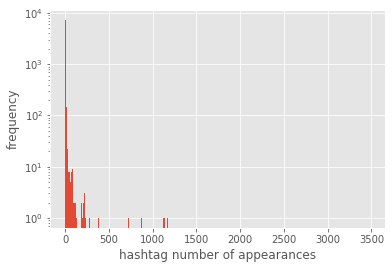

In [37]:
# number of times each hashtag appears
counts = flattened_hashtags_df.groupby(['hashtag']).size()\
                              .reset_index(name='counts')\
                              .counts

# define bins for histogram                              
my_bins = np.arange(0,counts.max()+2, 5)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('hashtag number of appearances')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

In [82]:
# take hashtags which appear at least this amount of times
min_appearance = 500
# find popular hashtags - make into python set for efficiency
popular_hashtags_set = set(popular_hashtags[
                           popular_hashtags.counts>=min_appearance
                           ]['hashtag'])

In [83]:
# make a new column with only the popular hashtags
hashtags_list_df['popular_hashtags'] = hashtags_list_df.hashtags.apply(
            lambda hashtag_list: [hashtag for hashtag in hashtag_list
                                  if hashtag in popular_hashtags_set])
hashtags_list_df

,hashtags,popular_hashtags
1,"[#NOJUSTICE, #TrumpPence]",[]
4,"[#CNN, #newday, #Trump, #ISIS]",[#Trump]
5,[#NeverTrump],[#NeverTrump]
6,"[#Trump2016, #TrumpPence16, #MakeAmericaGreatA...",[#TrumpPence16]
12,"[#TeamGov, #YouIn]",[]
15,"[#NeverTrump, #Crazy]",[#NeverTrump]
18,[#Hannity],[]
23,[#morningjoe],[]
26,"[#ISIS, #YouareResponsibleHillary]",[]
32,"[#NeverTrump, #BetterWay, #ImWithHer]","[#NeverTrump, #ImWithHer]"


In [84]:
# drop rows without popular hashtag
popular_hashtags_list_df = hashtags_list_df.loc[
            hashtags_list_df.popular_hashtags.apply(lambda hashtag_list: hashtag_list !=[])]
popular_hashtags_list_df

,hashtags,popular_hashtags
4,"[#CNN, #newday, #Trump, #ISIS]",[#Trump]
5,[#NeverTrump],[#NeverTrump]
6,"[#Trump2016, #TrumpPence16, #MakeAmericaGreatA...",[#TrumpPence16]
15,"[#NeverTrump, #Crazy]",[#NeverTrump]
32,"[#NeverTrump, #BetterWay, #ImWithHer]","[#NeverTrump, #ImWithHer]"
39,"[#CNN, #newday, #Trump]",[#Trump]
44,[#TrumpPence16],[#TrumpPence16]
47,"[#cnn, #NEWDAY, #Trump]",[#Trump]
50,"[#CNN, #newday, #msnbc, #Trump, #Obama]",[#Trump]
59,"[#Trump, #IKON, #trndnl]",[#Trump]


In [85]:
# make new dataframe
hashtag_vector_df = popular_hashtags_list_df.loc[:, ['popular_hashtags']]

for hashtag in popular_hashtags_set:
    # make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
        lambda hashtag_list: int(hashtag in hashtag_list))

In [86]:
hashtag_vector_df

,popular_hashtags,#NeverHillary,#DonaldTrump,#MAGA,#TrumpPence16,#CrookedHillary,#ImWithHer,#HillaryClinton,#Hillary,#Trump,#NeverTrump,#trump
4,[#Trump],0,0,0,0,0,0,0,0,1,0,0
5,[#NeverTrump],0,0,0,0,0,0,0,0,0,1,0
6,[#TrumpPence16],0,0,0,1,0,0,0,0,0,0,0
15,[#NeverTrump],0,0,0,0,0,0,0,0,0,1,0
32,"[#NeverTrump, #ImWithHer]",0,0,0,0,0,1,0,0,0,1,0
39,[#Trump],0,0,0,0,0,0,0,0,1,0,0
44,[#TrumpPence16],0,0,0,1,0,0,0,0,0,0,0
47,[#Trump],0,0,0,0,0,0,0,0,1,0,0
50,[#Trump],0,0,0,0,0,0,0,0,1,0,0
59,[#Trump],0,0,0,0,0,0,0,0,1,0,0


In [87]:
hashtag_matrix = hashtag_vector_df.drop('popular_hashtags', axis=1)

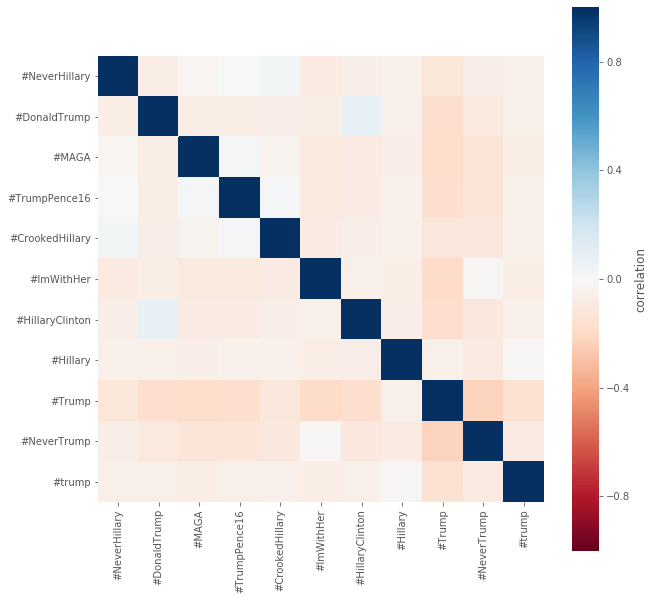

In [88]:
# calculate the correlation matrix
correlations = hashtag_matrix.corr()

# plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlations,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})
plt.show()